In [12]:
# Importando as bibliotecas necessárias
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, f1_score, confusion_matrix


In [13]:
# Carregar a base de dados Pima Indians Diabetes
url = "https://raw.githubusercontent.com/jbrownlee/Datasets/master/pima-indians-diabetes.data.csv"
column_names = ['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome']
data = pd.read_csv(url, header=None, names=column_names)

In [15]:
# Explorar os dados
print("Número de classes:", data['Outcome'].nunique())
print("Número de atributos:", data.shape[1] - 1)
print("Número de exemplos:", data.shape[0])
display(data.head())


Número de classes: 2
Número de atributos: 8
Número de exemplos: 768


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [16]:
# Separar os dados em conjuntos de treinamento e teste
X = data.drop('Outcome', axis=1)
y = data['Outcome']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [17]:
# Função para plotar as regiões de decisão
def plot_decision_regions(X, y, model):
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min , x_max , 0.01),
                         np.arange(y_min , y_max , 0.01))

    # Fazer previsões para cada ponto no grid
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    # Plotar as regiões de decisão
    plt.contourf(xx, yy, Z, alpha=0.3)
    plt.scatter(X[:, 0], X[:, 1], c=y, edgecolor='k', s=20)
    plt.title('Regiões de Decisão da Árvore de Decisão')
    plt.xlabel('Atributo 1')
    plt.ylabel('Atributo 2')
    plt.show()

In [18]:
# Treinar uma Árvore de Decisão e variar a profundidade máxima
max_depths = [1, 2, 3, 4, 5]
results = []

for max_depth in max_depths:
    # Criar o modelo da árvore de decisão
    model = DecisionTreeClassifier(max_depth=max_depth, random_state=42)
    
    # Usando apenas os dois primeiros atributos para treinar e prever
    model.fit(X_train[['Pregnancies', 'Glucose']], y_train)  
    
    # Fazer previsões no conjunto de teste
    predictions = model.predict(X_test[['Pregnancies', 'Glucose']])
    
    # Avaliar o desempenho
    accuracy = accuracy_score(y_test, predictions)
    f1 = f1_score(y_test, predictions)
    conf_matrix = confusion_matrix(y_test, predictions)
    
    # Armazenar os resultados
    results.append({
        'max_depth': max_depth,
        'accuracy': accuracy,
        'f1_score': f1,
        'confusion_matrix': conf_matrix,
        'model': model  # Armazenar o modelo para visualização posterior
    })

Profundidade Máxima: 1
Acurácia: 0.7403
F1-Score: 0.6491
Matriz de Confusão:
[[77 22]
 [18 37]]



c:\Users\lucas\Documents\Python\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


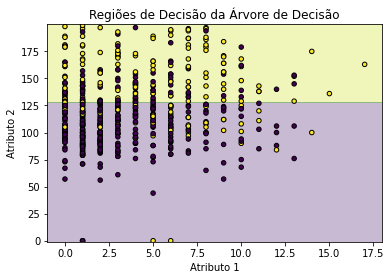

Profundidade Máxima: 2
Acurácia: 0.7143
F1-Score: 0.4211
Matriz de Confusão:
[[94  5]
 [39 16]]



c:\Users\lucas\Documents\Python\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


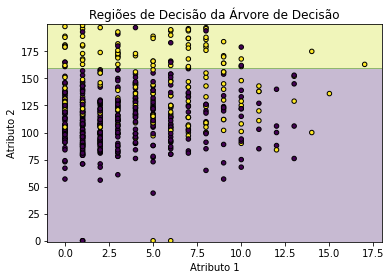

Profundidade Máxima: 3
Acurácia: 0.7662
F1-Score: 0.5814
Matriz de Confusão:
[[93  6]
 [30 25]]



c:\Users\lucas\Documents\Python\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


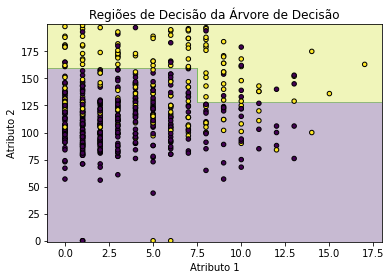

Profundidade Máxima: 4
Acurácia: 0.7532
F1-Score: 0.5778
Matriz de Confusão:
[[90  9]
 [29 26]]



c:\Users\lucas\Documents\Python\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


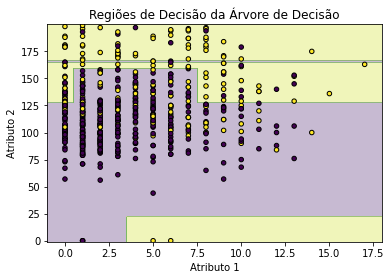

Profundidade Máxima: 5
Acurácia: 0.7597
F1-Score: 0.5647
Matriz de Confusão:
[[93  6]
 [31 24]]



c:\Users\lucas\Documents\Python\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


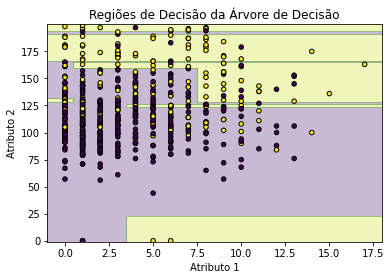

In [23]:
# Exibir os resultados e plotar as regiões de decisão para cada profundidade máxima
for result in results:
    print(f"Profundidade Máxima: {result['max_depth']}")
    print(f"Acurácia: {result['accuracy']:.4f}")
    print(f"F1-Score: {result['f1_score']:.4f}")
    print(f"Matriz de Confusão:\n{result['confusion_matrix']}\n")

    # Plotar as regiões de decisão usando apenas os dois primeiros atributos
    plot_decision_regions(X_train[['Pregnancies', 'Glucose']].to_numpy(), y_train.to_numpy(), result['model'])